# Hydrogen Bonds

In [1]:
import mdtraj as md
import pandas as pd
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.hbonds as hbonds
import matplotlib
import matplotlib.pyplot as plt

In [98]:
hbond_data[(hbond_data['donor_resid'] == 239) & (hbond_data['acceptor_resid'] == 235)]

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
262,262,0.0,4145,4085,ASN,239,H,HIS,235,O,2.039680,134.352493
637,637,0.0,9702,9642,ASN,239,H,HIS,235,O,2.133032,150.334976
1015,1015,0.0,15259,15199,ASN,239,H,HIS,235,O,1.968761,130.308090
1017,1017,0.0,15268,15199,ASN,239,HD21,HIS,235,O,2.045116,129.567581
1018,1018,0.0,15269,15191,ASN,239,HD22,HIS,235,ND1,2.856149,120.114319
1019,1019,0.0,15269,15194,ASN,239,HD22,HIS,235,NE2,2.285429,140.939819
1399,1399,0.0,20816,20756,ASN,239,H,HIS,235,O,2.212646,141.919769
1401,1401,0.0,20825,20756,ASN,239,HD21,HIS,235,O,1.903285,161.403793
1779,1779,0.0,26373,26313,ASN,239,H,HIS,235,O,1.859956,160.407501
2168,2168,10000.0,4145,4085,ASN,239,H,HIS,235,O,1.908016,141.070755


In [111]:
hbond_data_200_239[hbond_data_200_239['time'] == 10000]

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
5,5,10000.0,135769,26380,SOL,31410,HW2,ASN,239,OD1,2.515905,158.406937
6,6,10000.0,135768,20114,SOL,31410,HW1,ASN,200,O,2.881347,146.942581
7,7,10000.0,20111,135767,ASN,200,HD21,SOL,31410,OW,3.413682,128.111496
8,8,10000.0,4155,146993,ASN,239,HD22,SOL,35152,OW,2.910208,172.617279
9,9,10000.0,146995,25666,SOL,35152,HW2,ASN,200,OD1,3.222496,156.461426
10,10,10000.0,91045,4152,SOL,16502,HW2,ASN,239,OD1,2.938472,131.095245
11,11,10000.0,91044,25671,SOL,16502,HW1,ASN,200,O,2.698030,152.366531
12,12,10000.0,9712,101708,ASN,239,HD22,SOL,20057,OW,2.772254,168.491974
13,13,10000.0,3441,101708,ASN,200,HD22,SOL,20057,OW,3.284903,123.183327


In [105]:
hbond_data_235_239[hbond_data_235_239['time'] == 0]

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
0,0,0.0,4145,4085,ASN,239,H,HIS,235,O,2.834538,134.352493
1,1,0.0,9702,9642,ASN,239,H,HIS,235,O,3.047774,150.334976
2,2,0.0,15259,15199,ASN,239,H,HIS,235,O,2.732694,130.308090
3,3,0.0,15268,15199,ASN,239,HD21,HIS,235,O,2.792459,129.567581
4,4,0.0,15269,15191,ASN,239,HD22,HIS,235,ND1,3.474079,120.114319
5,5,0.0,15269,15194,ASN,239,HD22,HIS,235,NE2,3.134391,140.939819
6,6,0.0,20816,20756,ASN,239,H,HIS,235,O,3.069542,141.919769
7,7,0.0,20825,20756,ASN,239,HD21,HIS,235,O,2.871881,161.403793
8,8,0.0,26373,26313,ASN,239,H,HIS,235,O,2.835312,160.407501


In [116]:
hbond_data_200_243[hbond_data_200_243['time'] == 10000]

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
1,1,10000.0,20112,26463,ASN,200,HD22,GLU,243,OE1,2.72459,140.681107


In [10]:
hbond_data = pd.read_csv('/media/scottzhuang/data/MD/'+'4NPQ_F238L_pH70_md3/'+'/239_water_bridge_list.csv')
hbond_data_235_239 = pd.read_csv('/media/scottzhuang/data/MD/'+'4NPQ_F238L_pH70_md3/'+'/resid235_239_hbond.csv')
hbond_data_200_239 = pd.read_csv('/media/scottzhuang/data/MD/'+'4NPQ_F238L_pH70_md3/'+'/resid200_239_water_bridge.csv')
hbond_data_200_243 = pd.read_csv('/media/scottzhuang/data/MD/'+'4NPQ_F238L_pH70_md3/'+'/resid200_243_hbond.csv')

In [11]:
hbond_data

,Unnamed: 0,traj_time,resid,counterpart
0,0,0,4155,[4155]
1,1,0,4155,[4236]
2,2,0,26383,[26383]
3,3,0,26383,[26464]
4,4,0,26383,[26383]
5,5,0,26383,"[97646, 105227]"
6,6,0,26383,[26383]
7,7,0,26383,"[97646, 105227]"
8,8,10000,4155,[4155]
9,9,10000,4155,"[25666, 4236]"


In [9]:
hbond_data_200_239

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
0,0,0.0,135769,26380,SOL,31410,HW2,ASN,239,OD1,2.937417,136.899216
1,1,0.0,20111,135767,ASN,200,HD21,SOL,31410,OW,3.390295,132.088913
2,2,0.0,135768,20114,SOL,31410,HW1,ASN,200,O,2.646089,172.976379
3,3,0.0,117274,4152,SOL,25245,HW2,ASN,239,OD1,3.166420,131.076324
4,4,0.0,117273,25671,SOL,25245,HW1,ASN,200,O,2.723542,169.992035
5,5,10000.0,135769,26380,SOL,31410,HW2,ASN,239,OD1,2.515905,158.406937
6,6,10000.0,135768,20114,SOL,31410,HW1,ASN,200,O,2.881347,146.942581
7,7,10000.0,20111,135767,ASN,200,HD21,SOL,31410,OW,3.413682,128.111496
8,8,10000.0,4155,146993,ASN,239,HD22,SOL,35152,OW,2.910208,172.617279
9,9,10000.0,146995,25666,SOL,35152,HW2,ASN,200,OD1,3.222496,156.461426


In [8]:
hbond_data[hbond_data['donor_resid'] == 239]

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
47,47,0.0,4155,97646,ASN,239,HD22,SOL,18703,OW,3.220528,143.038162
105,105,0.0,26383,105227,ASN,239,HD22,SOL,21230,OW,2.879777,153.338974
197,197,10000.0,4155,146993,ASN,239,HD22,SOL,35152,OW,2.910208,172.617279
395,395,20000.0,4155,81134,ASN,239,HD22,SOL,13199,OW,2.941581,142.965836
409,409,20000.0,26383,151433,ASN,239,HD22,SOL,36632,OW,3.224915,128.995102
582,582,30000.0,26383,90017,ASN,239,HD22,SOL,16160,OW,2.905035,159.940918
590,590,30000.0,9712,128231,ASN,239,HD22,SOL,28898,OW,2.806525,144.736664
604,604,30000.0,4155,62090,ASN,239,HD22,SOL,6851,OW,2.958444,167.032089
875,875,50000.0,9712,118292,ASN,239,HD22,SOL,25585,OW,2.989673,142.973694
919,919,60000.0,20825,55817,ASN,239,HD21,SOL,4760,OW,3.358625,147.445328


In [61]:
hbond200_set = set(hbond_data_200[(hbond_data_200['donor_resid'] == 200) & (hbond_data_200['time'] == 0)]['acceptor_resid']).union(set(hbond_data_200[(hbond_data_200['acceptor_resid'] == 200) & (hbond_data_200['time'] == 0)]['donor_resid']))
hbond239_set = set(hbond_data_239[(hbond_data_239['donor_resid'] == 239) & (hbond_data_239['time'] == 0)]['acceptor_resid']).union(set(hbond_data_239[(hbond_data_239['acceptor_resid'] == 239) & (hbond_data_239['time'] == 0)]['donor_resid']))
print(hbond200_set.intersection(hbond239_set))

{31410, 25245}


In [215]:
df = pd.read_csv('/media/scottzhuang/data/MD/'+'4NPQ_F238L_pH70_md3/'+ 'hbond_analysis_helix.csv')

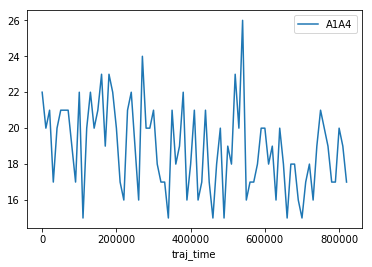

In [223]:
df.plot(x='traj_time',y='A1A4')

In [201]:
df[df['resid'] == 243]['h_bridge_inter_percent'].mean()

0.037650602409638557

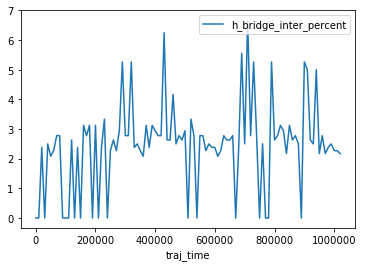

In [180]:
df[df['resid'] == 239].plot(x='traj_time',y='h_bridge_inter_percent')

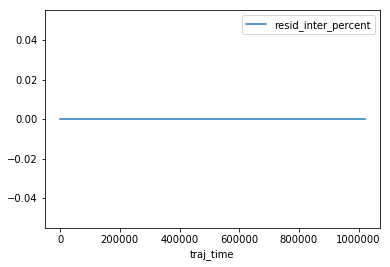

In [179]:
df[df['resid'] == 239].plot(x='traj_time',y='resid_inter_percent')

In [132]:
water_bridge_donor = df[df['time'] == 0][df['donor_resid'] == 200]

/home/scottzhuang/anaconda3/envs/deepchem/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [169]:
for donor_ind in sorted(set(water_bridge_donor['donor_index'])):
    for water_resid in set(water_bridge_donor[water_bridge_donor['donor_index'] == donor_ind]['acceptor_resid']):
        print(df[(df['time'] == 0) & (df['acceptor_resid'] == water_resid) & (df['donor_resid'] != 200)]['donor_index'])
        print(df[(df['time'] == 0) & (df['donor_resid'] == water_resid) & (df['donor_resid'] != 200)]['acceptor_index'])



Series([], Name: donor_index, dtype: int64)
24    15564
Name: acceptor_index, dtype: int64
Series([], Name: donor_index, dtype: int64)
69    15368
Name: acceptor_index, dtype: int64


In [163]:
df[(df['time'] == 0) & (df['acceptor_resid'] == 10887)]

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
68,68,0.0,14549,74477,ASN,200,HD22,SOL,10887,OW,2.835155,150.479553


In [159]:
df[(df['time'] == 0) & (df['donor_resid'] == 200)]

,Unnamed: 0,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
23,23,0.0,8994,127586,ASN,200,HD21,SOL,28590,OW,3.087237,155.861923
68,68,0.0,14549,74477,ASN,200,HD22,SOL,10887,OW,2.835155,150.479553


In [149]:
for water_resid in water_bridge_donor.acceptor_resid.values:
    print(df[(df['time'] == 0) & (df['acceptor_resid'] == water_resid)]['donor_index'].values.tolist())

[8994]
[14549]


In [229]:
df

,Unnamed: 0,traj_time,A1A1,A1A2,A1A3,A1A4,A2A2,A2A3,A2A4,A3A3,...,A2B3,A2B4,A3B1,A3B2,A3B3,A3B4,A4B1,A4B2,A4B3,A4B4
0,0,0,197,33,8,25,273,44,0,373,...,8,0,9,5,0,4,18,15,16,23
1,1,10000,219,29,11,21,281,40,0,370,...,6,0,13,8,0,1,29,3,8,3
2,2,20000,198,39,7,17,281,55,0,389,...,10,0,11,7,0,0,11,31,34,9
3,3,30000,210,32,8,22,290,45,0,379,...,10,0,7,8,0,0,26,28,53,5
4,4,40000,200,39,10,20,297,38,0,361,...,8,0,9,4,0,0,26,20,20,31
5,5,50000,201,35,9,14,301,51,0,403,...,6,0,10,5,0,3,11,33,43,35
6,6,60000,221,34,6,14,305,46,0,388,...,11,0,9,8,0,0,20,30,51,14
7,7,70000,212,30,8,24,273,54,0,355,...,11,0,8,7,0,1,46,22,47,26
8,8,80000,224,28,12,23,294,50,0,375,...,7,0,7,4,0,4,55,31,31,57
9,9,90000,200,38,9,22,287,53,0,383,...,7,0,7,6,0,0,7,15,37,41


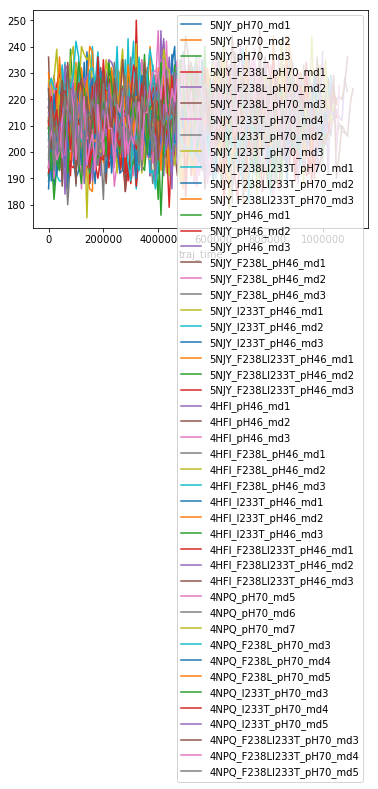

In [228]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']
ax =plt.subplot()
for traj_note in traj_notes:
    df = pd.read_csv('/media/scottzhuang/data/MD/'+ traj_note + '/hbond_analysis_helix.csv')
    df.plot(x='traj_time',y='A1A1',ax=ax)
ax.legend(traj_notes)

In [ ]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']
def create_water_bridge_data(md_data = None):
    import MDAnalysis as mda
    from MDAnalysis.analysis.hbonds import hbond_analysis 
    def append_water_bridge_data(traj_note,location = '/media/scottzhuang/data/MD/',skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        h =  hbond_analysis.HydrogenBondAnalysis(traj,'resid 243','resid 200', distance=3.5, angle=120.0,distance_type='heavy')
        h.run()
        print(h.count_by_time())
        h.generate_table()
        df = pd.DataFrame.from_records(h.table)
        df.to_csv(location + traj_note + "/resid200_243_hbond.csv")
    for traj_note in traj_notes:
        append_water_bridge_data(traj_note)

import pandas as pd
create_water_bridge_data()

In [ ]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']
def create_water_bridge_data(md_data = None):
    import MDAnalysis as mda
    from MDAnalysis.analysis.hbonds import hbond_analysis 
    def append_water_bridge_data(traj_note,location = '/media/scottzhuang/data/MD/',skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        h =  hbond_analysis.HydrogenBondAnalysis(traj,'resid 235','resid 239', distance=3.5, angle=120.0,distance_type='heavy')
        h.run()
        print(h.count_by_time())
        h.generate_table()
        df = pd.DataFrame.from_records(h.table)
        df.to_csv(location + traj_note + "/resid235_239_hbond.csv")
    for traj_note in traj_notes:
        append_water_bridge_data(traj_note)

import pandas as pd
create_water_bridge_data()

In [ ]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']
def create_water_bridge_data(md_data = None):
    import MDAnalysis as mda
    from MDAnalysis.analysis.hbonds import hbond_analysis 
    def append_water_bridge_data(traj_note,location = '/media/scottzhuang/data/MD/',skip=10):
        top_location = traj_note + '/' + traj_note + ".system.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        h =  hbond_analysis.HydrogenBondAnalysis(traj,'resid 239','resid 200', distance=3.5, angle=120.0,distance_type='heavy')
        h.run()
        print(h.count_by_time())
        h.generate_table()
        df = pd.DataFrame.from_records(h.table)
        df.to_csv(location + traj_note + "/resid200_239_hbond.csv")
    for traj_note in traj_notes:
        append_water_bridge_data(traj_note)

import pandas as pd
create_water_bridge_data()